Loading data: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1.npy
Data loading successful: Number of pulses 3000
Image saved: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1.png


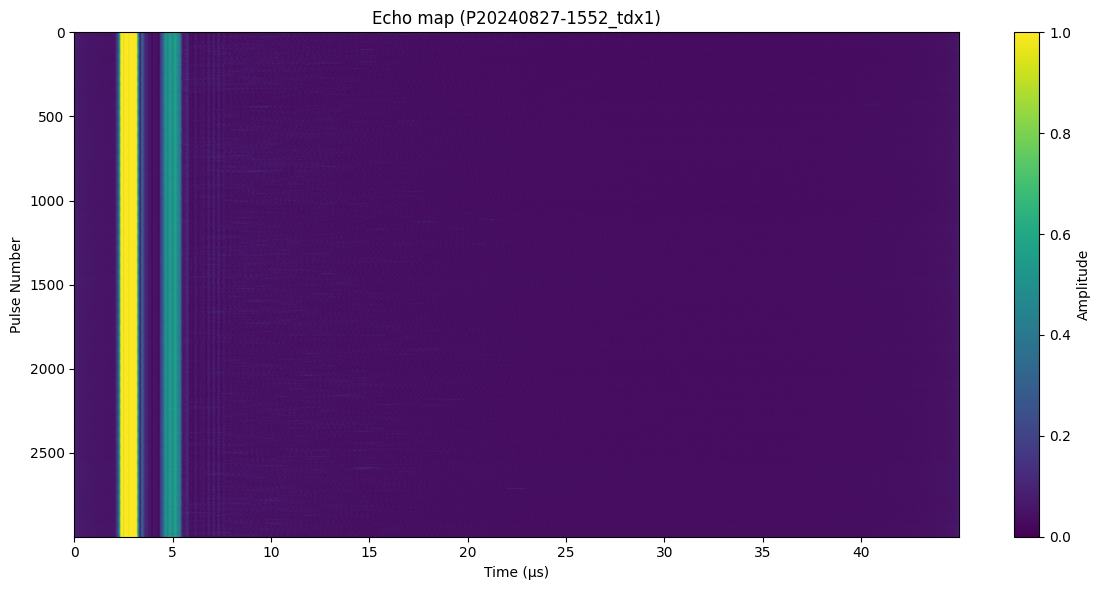

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_image_from_npy(npy_file_path, output_dir=None):
    """
    Function to load echo map data from .npy file and generate an image
    
    Parameters:
    -----------
    npy_file_path : str
        Path to .npy file
    output_dir : str
        Directory to save output image, if None, only display without saving
        
    Returns:
    --------
    None
    """
    # Load .npy file
    print(f"Loading data: {npy_file_path}")
    try:
        data = np.load(npy_file_path, allow_pickle=True).item()
        
        # Extract data
        hilbert_matrix_trimmed = data['hilbert_matrix']
        adjusted_time_us_trimmed = data['time_axis']
        n_pulses = data['n_pulses']
        
        print(f"Data loading successful: Number of pulses {n_pulses}")
        
        # Create plot
        plt.figure(figsize=(12, 6))
        if len(adjusted_time_us_trimmed) > 0:
            plt.imshow(hilbert_matrix_trimmed, aspect='auto', cmap='viridis', 
                    extent=[0, adjusted_time_us_trimmed[-1], n_pulses-0.5, -0.5],
                    vmin=0, vmax=1)
        else:
            # If time axis is empty, plot with default range
            plt.imshow(hilbert_matrix_trimmed, aspect='auto', cmap='viridis',
                    vmin=0, vmax=1)
        
        plt.colorbar(label='Amplitude')
        plt.xlabel('Time (μs)')
        plt.ylabel('Pulse Number')
        
        # Generate output filename from input filename
        base_filename = os.path.basename(npy_file_path)
        base_name = os.path.splitext(base_filename)[0]
        plt.title(f'Echo map ({base_name})')
        plt.tight_layout()
        
        # Save the image
        if output_dir is not None:
            # Create output directory if it doesn't exist
            os.makedirs(output_dir, exist_ok=True)
            
            # Generate output filename
            output_filename = f"{base_name}.png"
            output_path = os.path.join(output_dir, output_filename)
            
            # Save image
            plt.savefig(output_path)
            print(f"Image saved: {output_path}")
        
        plt.show()
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Jupyter環境ではargparseを使わず、直接パラメータを設定する
# Jupyter notebookでは引数解析が正しく動作しないため

# 例示用のファイルパス
example_file = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp\\P20240827-1552_tdx1.npy"
example_output = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp"

# 使用するファイルパスと出力ディレクトリを直接指定
npy_file = example_file
output_dir = example_output

# 関数を呼び出して画像を生成・表示
generate_image_from_npy(npy_file, output_dir)

# コマンドライン引数を使用したい場合は、このノートブックをPythonスクリプトとして
# 保存し、コマンドラインから実行してください。
# 例: python bin2img.py path/to/file.npy --output_dir path/to/output

詳細表示用データを読み込んでいます: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1.npy
データ読み込み成功: パルス数 60
詳細画像を保存しました: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1_detail_5-40us.png


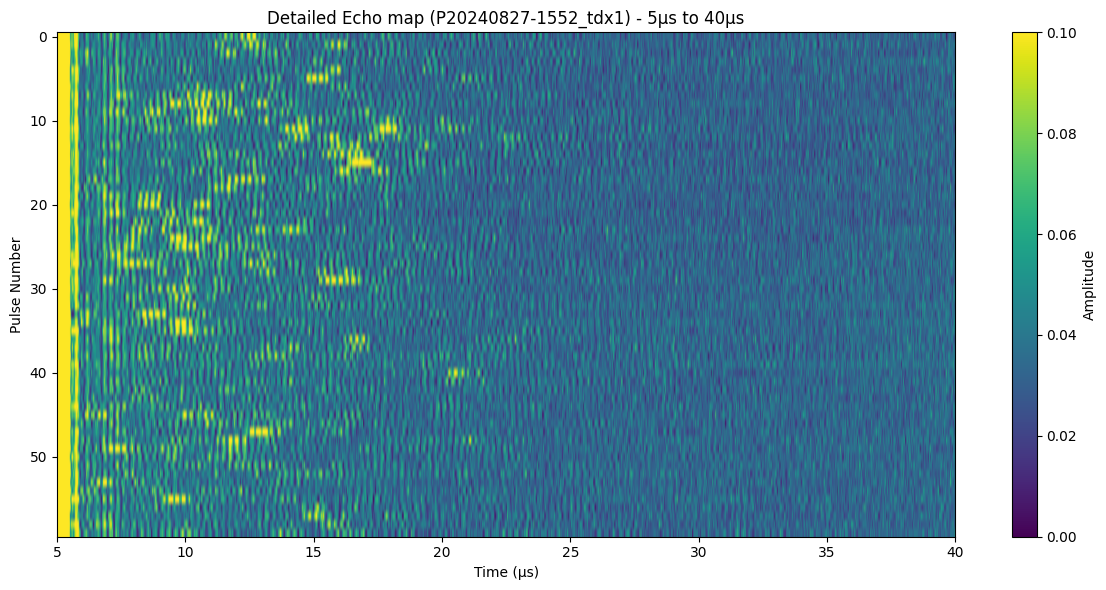

In [15]:
def generate_detailed_image_from_npy(npy_file_path, time_start=6, time_end=40, amplitude_max=0.4, output_dir=None):
    """
    .npyファイルから保存されたエコーマップデータを読み込み、指定した時間範囲と振幅範囲で詳細な画像を生成する関数
    
    Parameters:
    -----------
    npy_file_path : str
        .npyファイルのパス
    time_start : float
        表示する時間範囲の開始点 (μs)
    time_end : float
        表示する時間範囲の終了点 (μs)
    amplitude_max : float
        表示する振幅の最大値 (0〜1の範囲内)
    output_dir : str
        出力画像を保存するディレクトリ、Noneの場合は保存せずに表示のみ
        
    Returns:
    --------
    None
    """
    # .npyファイルを読み込む
    print(f"詳細表示用データを読み込んでいます: {npy_file_path}")
    try:
        data = np.load(npy_file_path, allow_pickle=True).item()
        
        # データを取り出す
        hilbert_matrix_trimmed = data['hilbert_matrix']
        adjusted_time_us_trimmed = data['time_axis']
        n_pulses = data['n_pulses']
        
        print(f"データ読み込み成功: パルス数 {n_pulses}")
        
        # 指定された時間範囲のインデックスを見つける
        if len(adjusted_time_us_trimmed) > 0:
            time_start_idx = np.argmin(np.abs(adjusted_time_us_trimmed - time_start))
            time_end_idx = np.argmin(np.abs(adjusted_time_us_trimmed - time_end))
            
            # 指定された時間範囲のデータを抽出
            time_slice = adjusted_time_us_trimmed[time_start_idx:time_end_idx+1]
            data_slice = hilbert_matrix_trimmed[:, time_start_idx:time_end_idx+1]
            
            # プロットを作成
            plt.figure(figsize=(12, 6))
            plt.imshow(data_slice, aspect='auto', cmap='viridis', 
                    extent=[time_start, time_end, n_pulses-0.5, -0.5],
                    vmin=0, vmax=amplitude_max)
            
            plt.colorbar(label='Amplitude')
            plt.xlabel('Time (μs)')
            plt.ylabel('Pulse Number')
            
            # 入力ファイル名から出力ファイル名を生成
            base_filename = os.path.basename(npy_file_path)
            base_name = os.path.splitext(base_filename)[0]
            plt.title(f'Detailed Echo map ({base_name}) - {time_start}μs to {time_end}μs')
            plt.tight_layout()
            
            # 画像を保存する
            if output_dir is not None:
                # 出力ディレクトリが存在しない場合は作成
                os.makedirs(output_dir, exist_ok=True)
                
                # 出力ファイル名を生成
                output_filename = f"{base_name}_detail_{time_start}-{time_end}us.png"
                output_path = os.path.join(output_dir, output_filename)
                
                # 画像を保存
                plt.savefig(output_path)
                print(f"詳細画像を保存しました: {output_path}")
            
            plt.show()
        else:
            print("警告: 時間軸データが空です。詳細プロットを作成できません。")
        
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        return None

# 詳細表示の例
generate_detailed_image_from_npy(npy_file, time_start=5, time_end=40, amplitude_max=0.1, output_dir=output_dir)


In [1]:
from src import generate_image_from_npy,generate_detailed_image_from_npy
example_file = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp\\P20240827-1552_tdx1.npy"
example_output = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp"

# 使用するファイルパスと出力ディレクトリを直接指定
npy_file = example_file
output_dir = example_output

# 関数を呼び出して画像を生成・表示
generate_detailed_image_from_npy(npy_file, output_dir)

詳細表示用データを読み込んでいます: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1.npy
データ読み込み成功: パルス数 3000
エラーが発生しました: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U42')) -> None


Loading data...
loading success
cuda
Found 60 triggered pulses
Hilbert transform matrix shape: (60, 5208) (number of pulses x number of samples)
パルス数: 60
画像を保存しました: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1.png
信号波形データを保存しました: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240827-1552_tdx1.npy


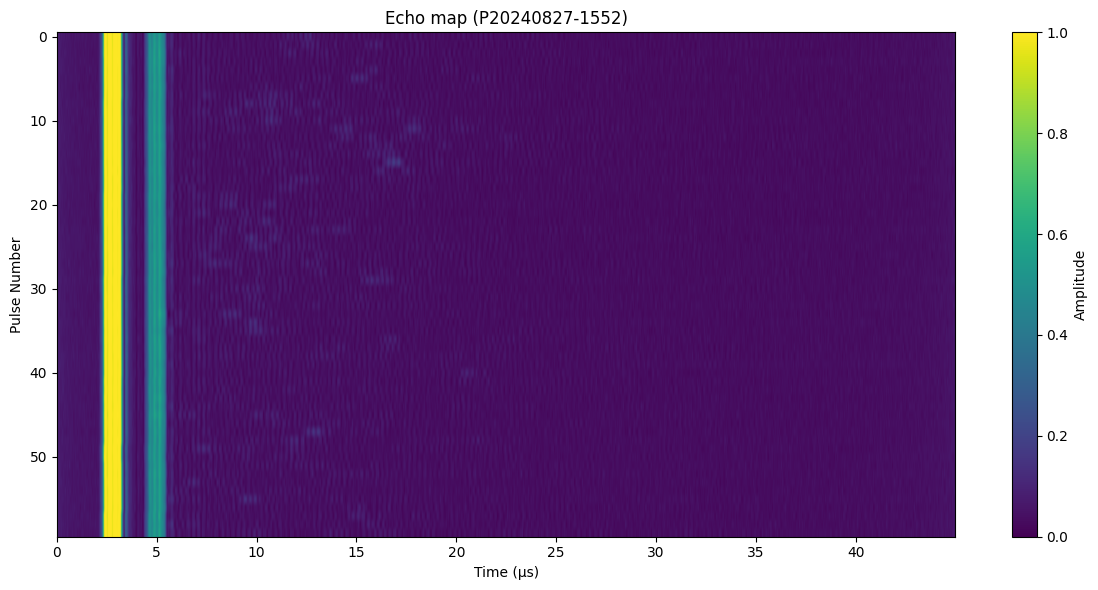

<Figure size 1500x1200 with 0 Axes>

In [14]:
from src import generate_echomap

file_path = "Z:\database\signal_mat\P20240827-1552.mat"
save_dir = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp"
triggered_pulses, adjusted_time_us, mean_pulse, std_pulse = generate_echomap(
    file_path, 
    start_time=2, 
    duration=0.02,
    window_width=100e-6, 
    amplitude_threshold=2.0, 
    output_dir=save_dir)

Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(1,)
- TDX1: shape=(1, 260416673)
- TDX2: shape=(1, 260416673)
- TDX3: shape=(1, 260416673)
- TDX1_enlarged: shape=(1, 260416673)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


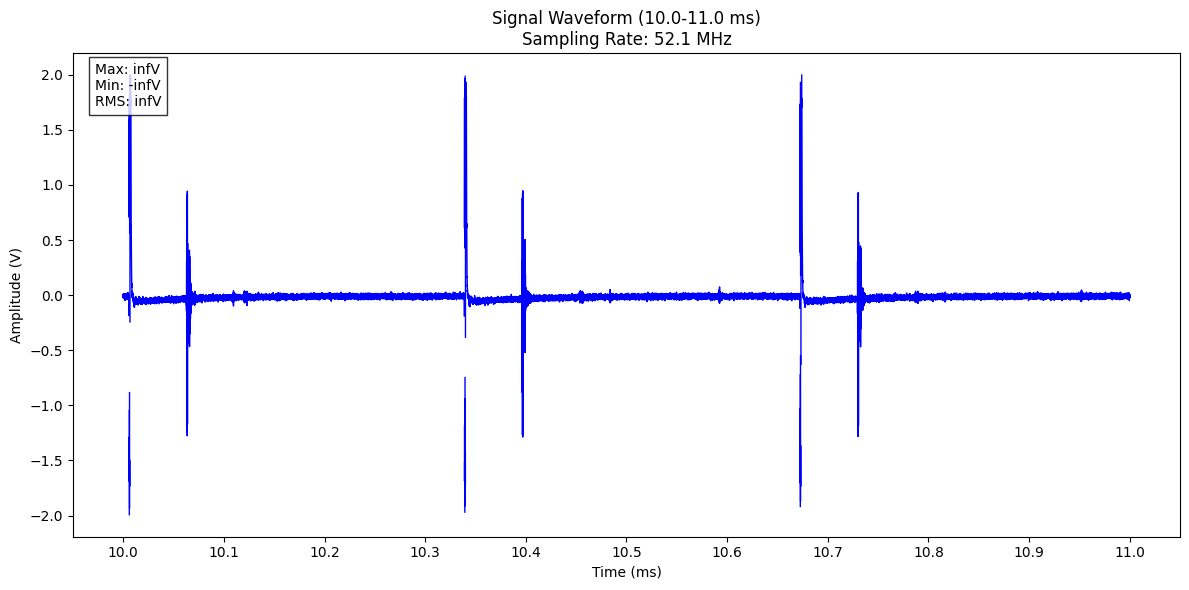

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
def plot_signal_waveform(file_path, start_ms=0, end_ms=100):
    """
    Display signal waveform from .mat file
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_ms : float 
        Start time (milliseconds)
    end_ms : float
        End time (milliseconds)
    """
    # Load and inspect data
    mat_data = sio.loadmat(file_path)
    
    # Display available keys
    print("Available keys in file:")
    for key in mat_data.keys():
        if not key.startswith('__'):
            print(f"- {key}: shape={mat_data[key].shape}")
    
    # Try different possible channel names
    channel_names = ['TDX1', 'A', 'B', 'Channel_A', 'Channel_1']
    signal = None
    
    for name in channel_names:
        if name in mat_data:
            signal = mat_data[name].flatten()
            print(f"Using channel: {name}")
            break
    
    if signal is None:
        raise ValueError("No valid channel found in the file")
    
    # Get sampling frequency
    if 'Tinterval' in mat_data:
        sampling_interval = mat_data['Tinterval'][0][0]  # sampling interval (s)
        sampling_rate = 1 / sampling_interval
        print(f"Sampling rate from file: {sampling_rate/1e6:.1f} MHz")
    else:
        print("Warning: Sampling rate not found, using default 62.5MHz")
        sampling_rate = 62.5e6  # Hz
    
    # Generate time axis (milliseconds)
    time_ms = np.arange(len(signal)) / sampling_rate * 1000
    
    # Limit display range
    mask = (time_ms >= start_ms) & (time_ms <= end_ms)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    plt.plot(time_ms[mask], signal[mask], 'b-', linewidth=1)
    #plt.grid(True, which='both')
    #plt.minorticks_on()
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')
    plt.title(f'Signal Waveform ({start_ms:.1f}-{end_ms:.1f} ms)\nSampling Rate: {sampling_rate/1e6:.1f} MHz')
    
    # Set x-axis ticks
    tick_interval = 0.1  # 0.1ms intervals
    plt.xticks(np.arange(start_ms, end_ms+tick_interval, tick_interval))
    
    # Display statistics
    signal_section = signal[mask]
    plt.text(0.02, 0.98, 
             f'Max: {np.max(signal_section):.3f}V\n'
             f'Min: {np.min(signal_section):.3f}V\n'
             f'RMS: {np.sqrt(np.mean(signal_section**2)):.3f}V',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Run analysis
#file_path = '/mnt/sdb/matsubara/tmp/sensor_data.mat'
file_path = "Z:\database\samples\P20240726-1334.mat"
plot_signal_waveform(file_path, start_ms=10, end_ms=11)

Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(1,)
- TDX1: shape=(1, 260416673)
- TDX2: shape=(1, 260416673)
- TDX3: shape=(1, 260416673)
- TDX1_enlarged: shape=(1, 260416673)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


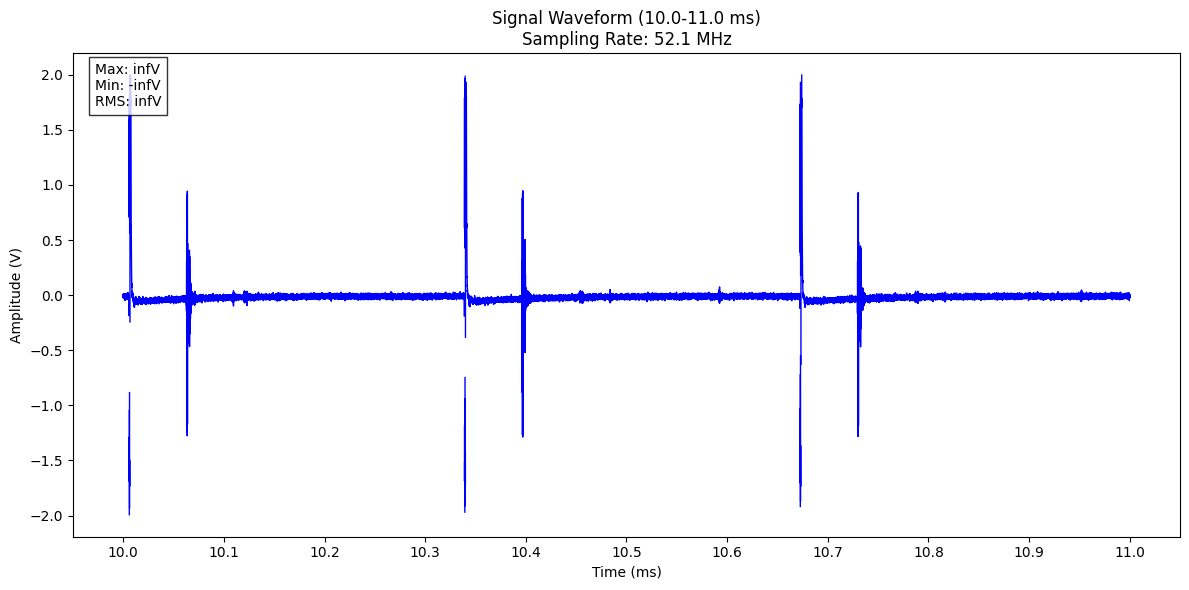

In [2]:
from src import inspect_structure,plot_signal_waveform
file_path = "Z:\database\samples\P20240726-1334.mat"
plot_signal_waveform(file_path, start_ms=10, end_ms=11)

Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(1,)
- TDX1: shape=(1, 260416673)
- TDX2: shape=(1, 260416673)
- TDX3: shape=(1, 260416673)
- TDX1_enlarged: shape=(1, 260416673)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


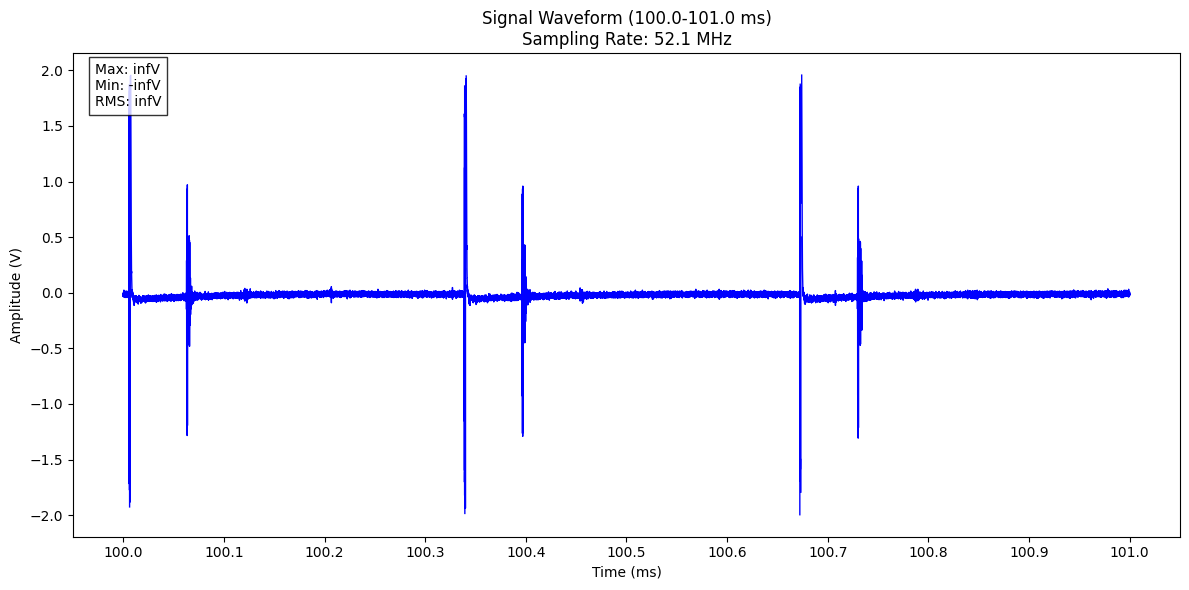

Loading data...
loading success
Found 15 triggered pulses
Hilbert transform matrix shape: (15, 5208) (number of pulses x number of samples)


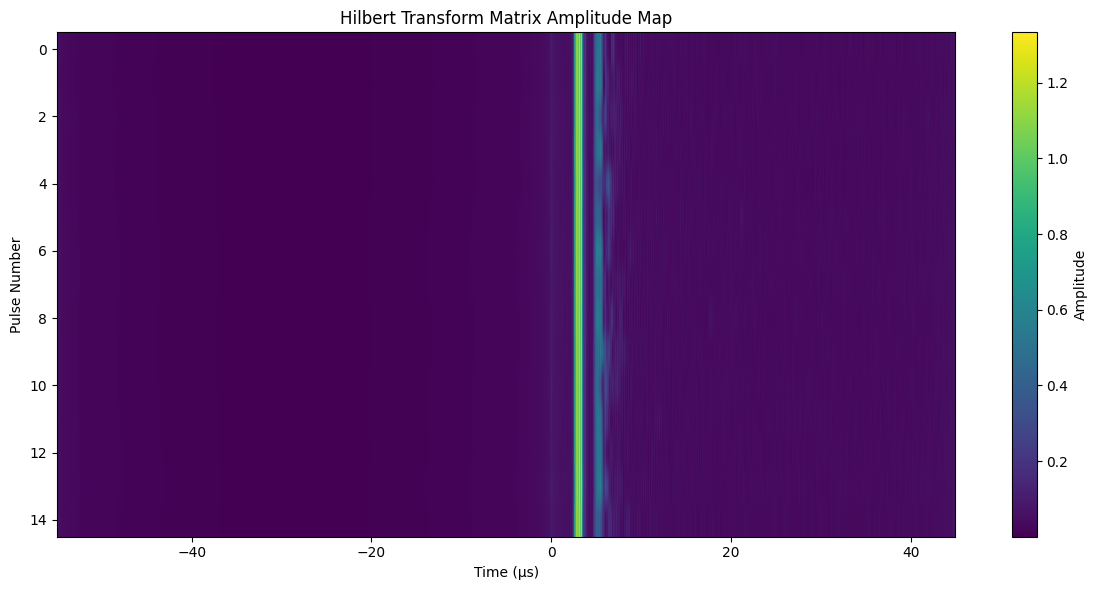

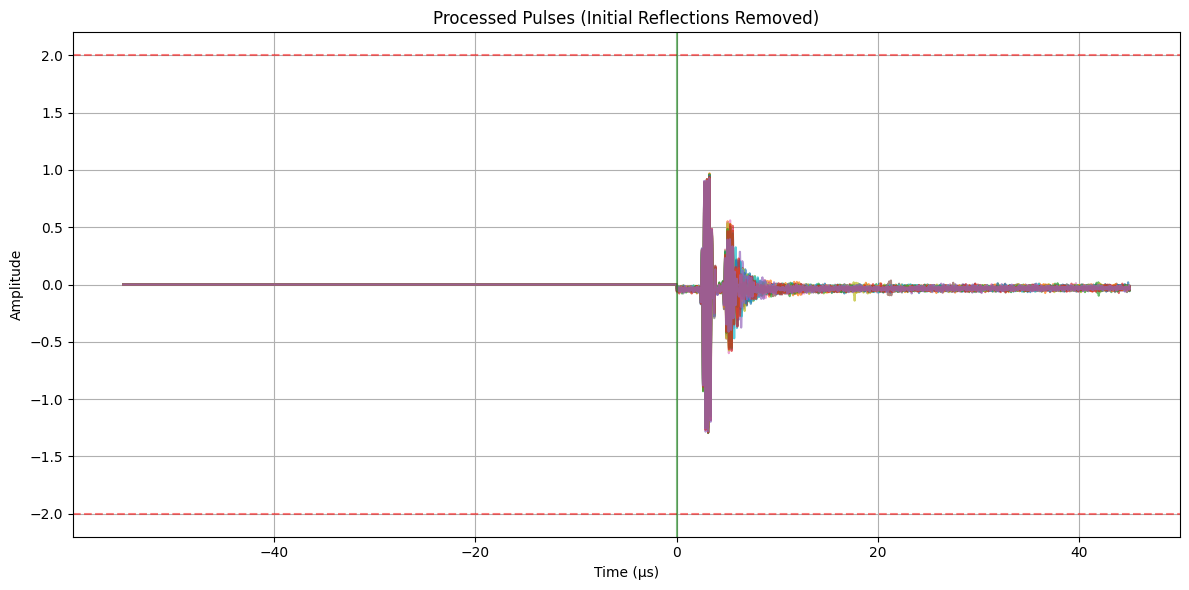

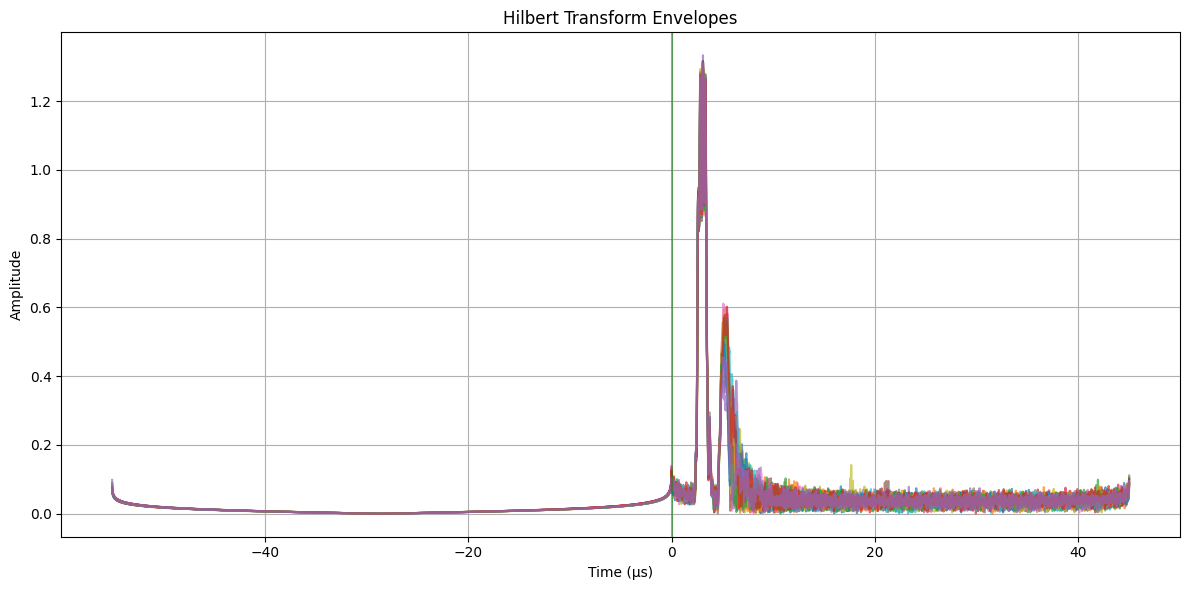

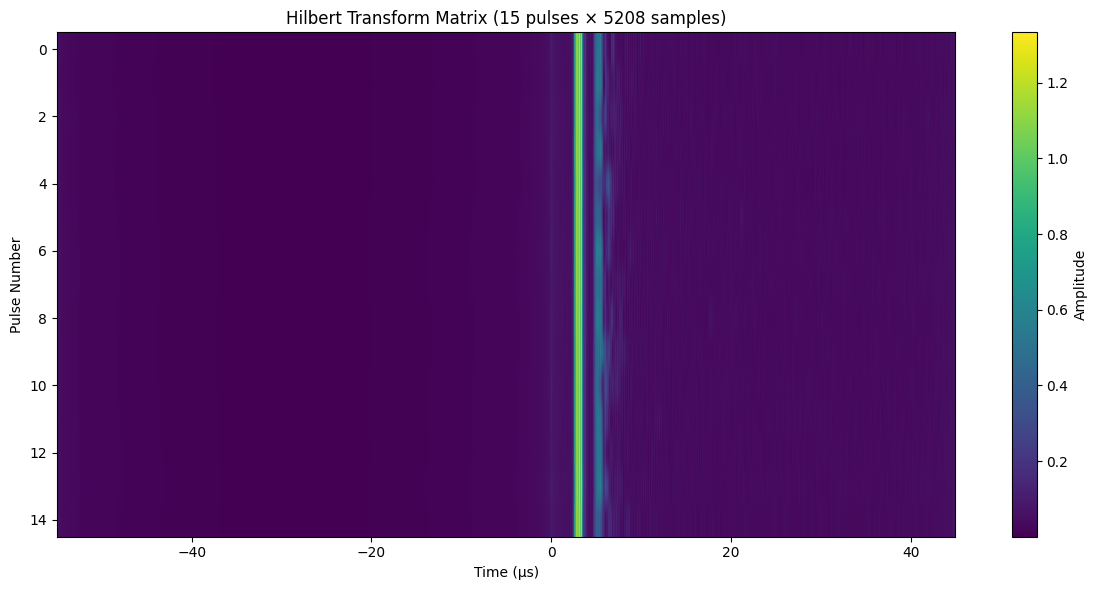

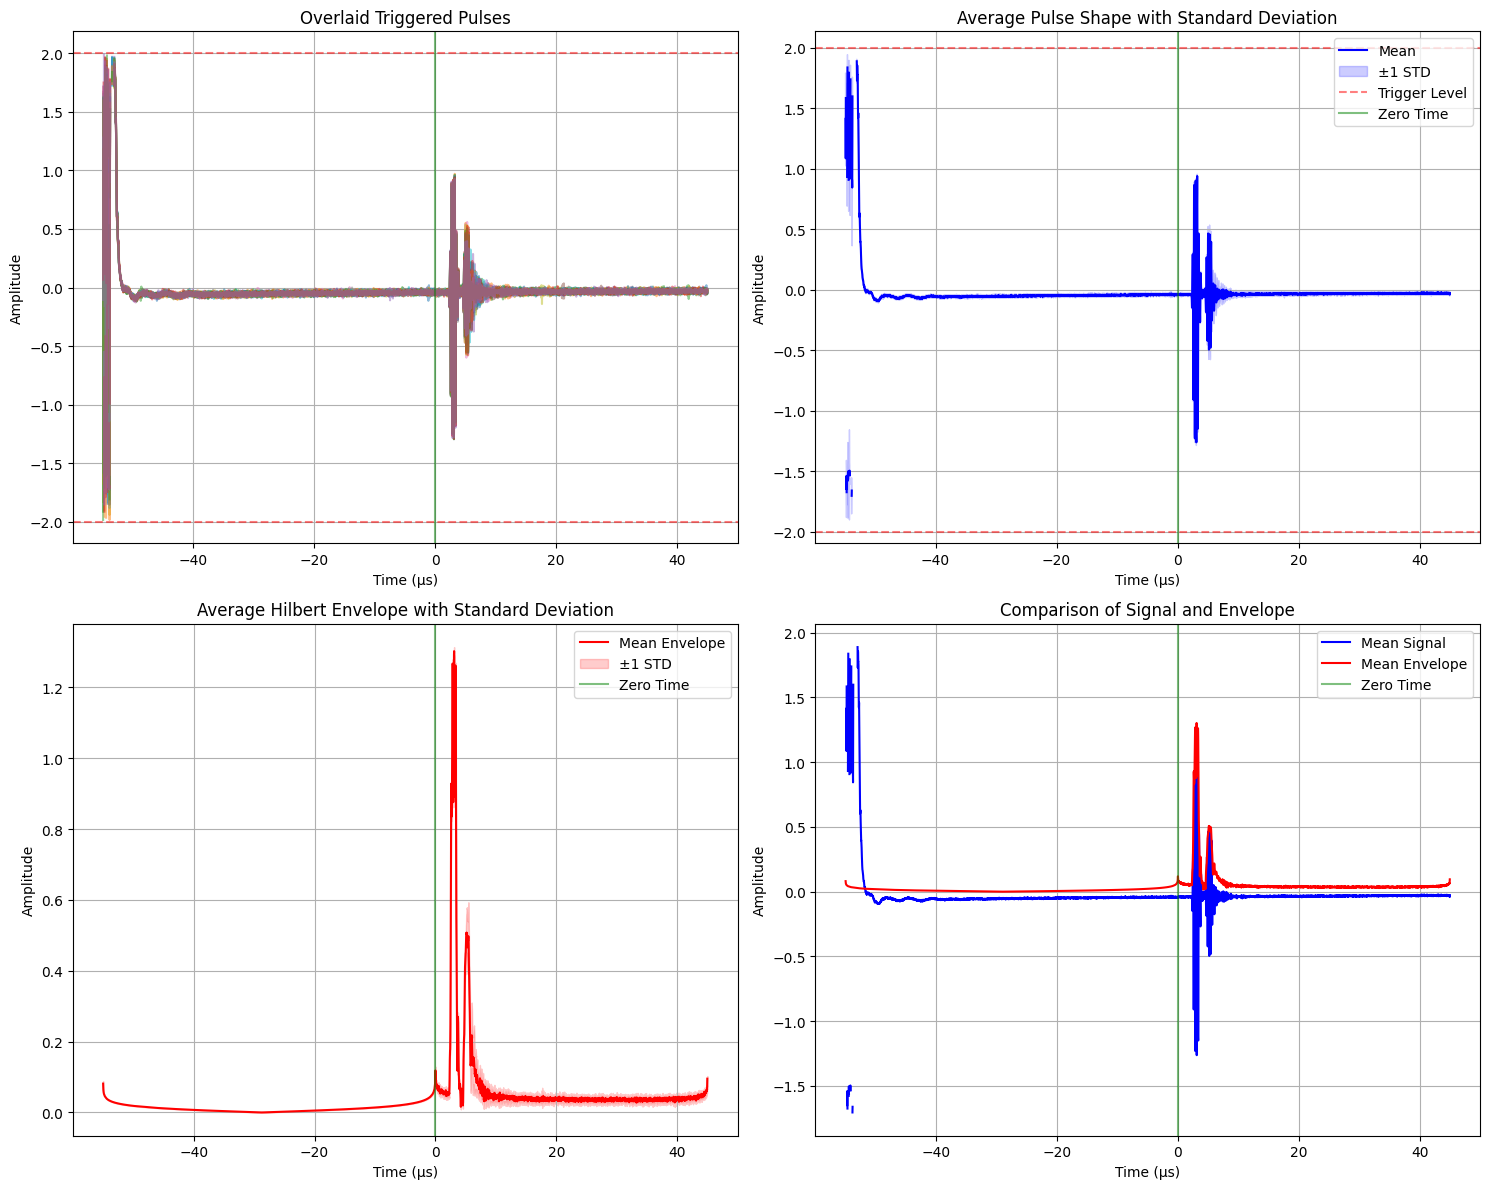

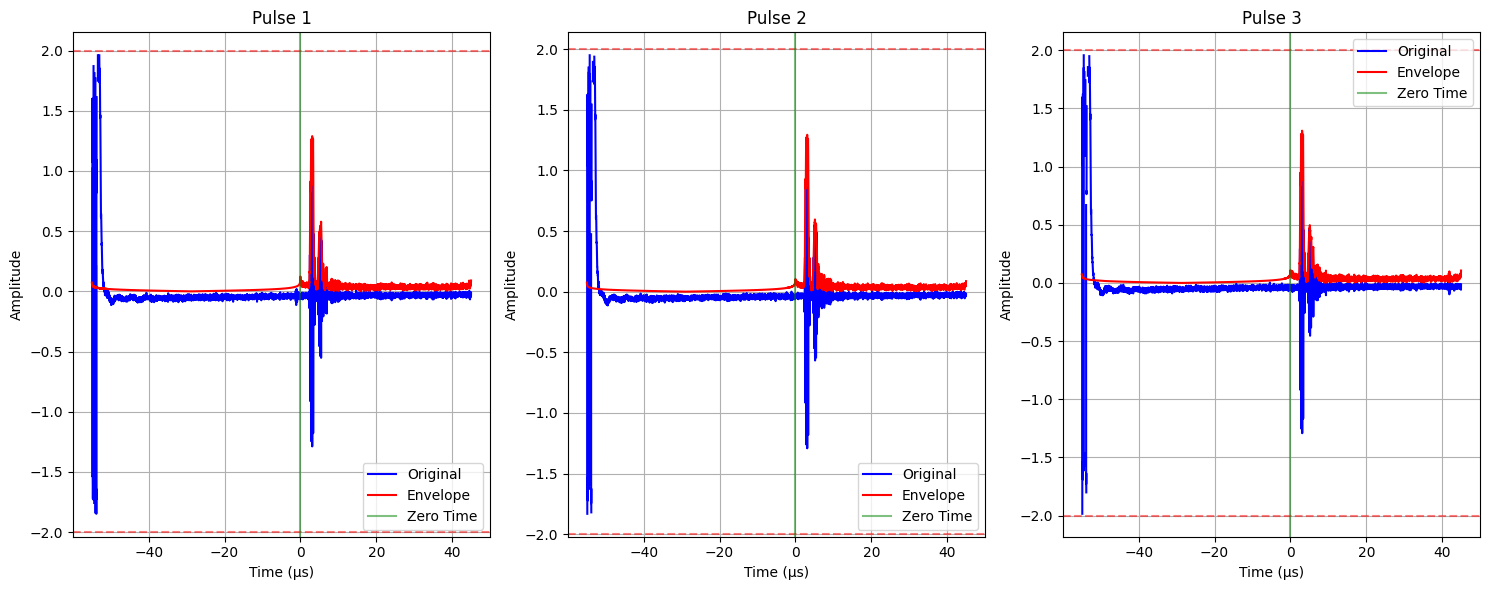

In [4]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy import signal

def extract_amplitude_triggered_pulses(file_path, start_time=0.444, duration=0.001, 
                                    window_width=50e-6, amplitude_threshold=2.0):
    """
    振幅が閾値に達した瞬間から一定時間の波形を切り出す関数
    
    Parameters:
    -----------
    file_path : str
        .matファイルのパス
    start_time : float
        開始時間（秒）
    duration : float
        解析時間幅（秒）
    window_width : float
        切り出す窓幅（秒）、デフォルト50μs
    amplitude_threshold : float
        トリガーとなる振幅閾値
    
    Returns:
    --------
    triggered_pulses : list
        トリガーされたパルスのリスト
    adjusted_time_us : ndarray
        調整された時間軸（μs）
    mean_pulse : ndarray
        平均パルス波形
    std_pulse : ndarray
        パルス波形の標準偏差
    """
    # データ読み込み
    print("Loading data...")
    mat_data = sio.loadmat(file_path)
    print("loading success")
    signal_data = np.squeeze(mat_data["TDX1"])
    Tinterval = float(mat_data['Tinterval'].item())
    Fs = 1.0 / Tinterval
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # 指定時間範囲のデータ切り出し
    start_idx = int(start_time * Fs)
    duration_samples = int(duration * Fs)
    chunk = signal_data[start_idx:start_idx + duration_samples]
    
    # 振幅閾値を超えた位置の検出
    window_samples = int(window_width * Fs)
    trigger_points = []
    i = 0
    
    while i < len(chunk) - window_samples:
        if abs(chunk[i]) >= amplitude_threshold:
            trigger_points.append(i)
            i += window_samples  # 次のトリガー検索は window_width 秒後から
        else:
            i += 1
    
    # 各トリガーポイントからの波形切り出し
    # トリガーされたパルスを格納するリストを初期化
    triggered_pulses = []  # 生のパルスデータを格納
    triggered_pulses_processed = []  # 処理済みパルスデータを格納
    triggered_pulses_hilbert = []  # 処理済みパルスデータを格納
    # 各トリガーポイントに対してパルスを切り出し
    for trigger in trigger_points:
        # トリガーポイントからwindow_samples秒分のパルスを切り出し
        if trigger + window_samples <= len(chunk):
            # パルスの切り出し
            pulse = chunk[trigger:trigger + window_samples]
            triggered_pulses.append(pulse)
            
            # 初期の反射波を除去（0-3μsまでの信号を0に設定）
            neglegible_time = 55e-6 # meaningless time
            processed_pulse = pulse.copy()  # パルスのコピー作成
            zero_samples = int(neglegible_time * Fs)  # 3μs分のサンプル数計算
            processed_pulse[:zero_samples] = 0  # 初期部分を0に設定
            triggered_pulses_processed.append(processed_pulse)
            
            # ヒルベルト変換を適用して振幅情報を抽出
            # scipyのsignalモジュールからhilbert関数をインポートする必要があります
            from scipy.signal import hilbert
            analytic_signal = hilbert(processed_pulse)
            amplitude_envelope = np.abs(analytic_signal)
            
            # ヒルベルト変換後の振幅情報を格納
            if 'triggered_pulses_hilbert' not in locals():
                triggered_pulses_hilbert = []
            triggered_pulses_hilbert.append(amplitude_envelope)
    
    # 検出されたパルス数を記録
    n_pulses = len(triggered_pulses)
    print(f"Found {n_pulses} triggered pulses")
    
    # 時間軸の生成（μs単位）
    pulse_time_us = np.arange(window_samples) * Tinterval * 1e6  # 時間軸をμs単位で作成
    
    # negligible_timeが経過した時点を0とした時間軸
    zero_samples = int(neglegible_time * Fs)
    adjusted_time_us = np.arange(-zero_samples, window_samples-zero_samples) * Tinterval * 1e6
    
    # ヒルベルト変換データを行列形式に変換
    hilbert_matrix = np.array(triggered_pulses_hilbert)
    print(f"Hilbert transform matrix shape: {hilbert_matrix.shape} (number of pulses x number of samples)")
    
    # Plot Hilbert transform matrix as colormap
    plt.figure(figsize=(12, 6))
    im = plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
                   extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    plt.colorbar(im, label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title('Hilbert Transform Matrix Amplitude Map')
    plt.tight_layout()
    
    # 処理済みパルスを大きくプロットする
    plt.figure(figsize=(12, 6))
    
    for i, processed_pulse in enumerate(triggered_pulses_processed):
        plt.plot(adjusted_time_us, processed_pulse, alpha=0.7, label=f'Processed Pulse {i+1}' if i < 5 else '')
    
    plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Processed Pulses (Initial Reflections Removed)')
    plt.grid(True)
    if n_pulses <= 5:
        plt.legend()
    plt.tight_layout()
    
    # ヒルベルト変換後のエンベロープをプロットする
    plt.figure(figsize=(12, 6))
    for i, envelope in enumerate(triggered_pulses_hilbert):
        plt.plot(adjusted_time_us, envelope, alpha=0.7, label=f'Envelope {i+1}' if i < 5 else '')
    
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Hilbert Transform Envelopes')
    plt.grid(True)
    if n_pulses <= 5:
        plt.legend()
    plt.tight_layout()
    
    # ヒルベルト変換行列をヒートマップとして表示
    plt.figure(figsize=(12, 6))
    plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
               extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title(f'Hilbert Transform Matrix ({n_pulses} pulses × {hilbert_matrix.shape[1]} samples)')
    plt.tight_layout()
    plt.show()
    
    # プロット
    plt.figure(figsize=(15, 12))
    
    # 1. すべてのパルスを重ねて表示
    plt.subplot(2, 2, 1)
    for i, pulse in enumerate(triggered_pulses):
        plt.plot(adjusted_time_us, pulse, alpha=0.5, label=f'Pulse {i+1}' if i < 5 else '')
    plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Overlaid Triggered Pulses')
    plt.grid(True)
    if n_pulses <= 5:
        plt.legend()
    
    # 2. 平均波形の表示
    mean_pulse = np.mean(triggered_pulses, axis=0)
    std_pulse = np.std(triggered_pulses, axis=0)
    
    plt.subplot(2, 2, 2)
    plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean')
    plt.fill_between(adjusted_time_us, 
                    mean_pulse - std_pulse, 
                    mean_pulse + std_pulse, 
                    color='b', alpha=0.2, label='±1 STD')
    plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Average Pulse Shape with Standard Deviation')
    plt.grid(True)
    plt.legend()
    
    # 3. ヒルベルト変換の平均波形
    mean_hilbert = np.mean(triggered_pulses_hilbert, axis=0)
    std_hilbert = np.std(triggered_pulses_hilbert, axis=0)
    
    plt.subplot(2, 2, 3)
    plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    plt.fill_between(adjusted_time_us, 
                    mean_hilbert - std_hilbert, 
                    mean_hilbert + std_hilbert, 
                    color='r', alpha=0.2, label='±1 STD')
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Average Hilbert Envelope with Standard Deviation')
    plt.grid(True)
    plt.legend()
    
    # 4. 生波形と包絡線の比較
    plt.subplot(2, 2, 4)
    plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean Signal')
    plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Comparison of Signal and Envelope')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 個別パルスの表示（最大3つまで）
    n_display = min(3, n_pulses)
    if n_display > 0:
        plt.figure(figsize=(15, 6))
        for i in range(n_display):
            plt.subplot(1, 3, i+1)
            plt.plot(adjusted_time_us, triggered_pulses[i], 'b-', label='Original')
            plt.plot(adjusted_time_us, triggered_pulses_hilbert[i], 'r-', label='Envelope')
            plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5)
            plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
            plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
            plt.xlabel('Time (μs)')
            plt.ylabel('Amplitude')
            plt.title(f'Pulse {i+1}')
            plt.grid(True)
            plt.legend()
        plt.tight_layout()
        plt.show()
    
    return triggered_pulses, adjusted_time_us, mean_pulse, std_pulse

# 使用例
file_path = "Z:\database\samples\P20240726-1334.mat"
plot_signal_waveform(file_path, start_ms=100, end_ms=101)
pulses, time, mean_pulse, std_pulse = extract_amplitude_triggered_pulses(
    file_path,
    start_time=4.0, #秒, 計測の開始点
    duration=0.005, #秒, 計測時間
    window_width=100e-6, #3khzで照射しているので、パルスは1msに3回
    amplitude_threshold=2.0
)

In [ ]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy import signal

def extract_amplitude_triggered_pulses(file_path, start_time=0.444, duration=0.001, 
                                    window_width=50e-6, amplitude_threshold=2.0):
    """
    Function to extract waveforms for a fixed time after amplitude reaches threshold
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_time : float
        Start time (seconds)
    duration : float
        Analysis time width (seconds)
    window_width : float
        Width of extraction window (seconds), default 50μs
    amplitude_threshold : float
        Amplitude threshold for triggering
    
    Returns:
    --------
    triggered_pulses : list
        List of triggered pulses
    adjusted_time_us : ndarray
        Adjusted time axis (μs)
    mean_pulse : ndarray
        Mean pulse waveform
    std_pulse : ndarray
        Standard deviation of pulse waveforms
    """
    # Load data
    print("Loading data...")
    mat_data = sio.loadmat(file_path)
    print("loading success")
    signal_data = np.squeeze(mat_data["TDX1"])
    Tinterval = float(mat_data['Tinterval'].item())
    Fs = 1.0 / Tinterval
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Extract data from specified time range
    start_idx = int(start_time * Fs)
    duration_samples = int(duration * Fs)
    chunk = signal_data[start_idx:start_idx + duration_samples]
    
    # Detect positions where amplitude exceeds threshold
    window_samples = int(window_width * Fs)
    trigger_points = []
    i = 0
    
    while i < len(chunk) - window_samples:
        if abs(chunk[i]) >= amplitude_threshold:
            trigger_points.append(i)
            i += window_samples  # Start next trigger search after window_width seconds
        else:
            i += 1
    
    # Extract waveforms from each trigger point
    # Initialize lists to store triggered pulses
    triggered_pulses = []  # Store raw pulse data
    triggered_pulses_processed = []  # Store processed pulse data
    triggered_pulses_hilbert = []  # Store processed pulse data
    # Extract pulses for each trigger point
    for trigger in trigger_points:
        # Extract pulse for window_samples seconds from trigger point
        if trigger + window_samples <= len(chunk):
            # Extract pulse
            pulse = chunk[trigger:trigger + window_samples]
            triggered_pulses.append(pulse)
            
            # Remove initial reflections (set signal from 0-3μs to 0)
            neglegible_time = 55e-6 # meaningless time
            processed_pulse = pulse.copy()  # Create copy of pulse
            zero_samples = int(neglegible_time * Fs)  # Calculate samples for 3μs
            processed_pulse[:zero_samples] = 0  # Set initial part to 0
            triggered_pulses_processed.append(processed_pulse)
            
            # Apply Hilbert transform to extract amplitude information
            # Need to import hilbert function from scipy.signal module
            from scipy.signal import hilbert
            analytic_signal = hilbert(processed_pulse)
            amplitude_envelope = np.abs(analytic_signal)
            
            # Store amplitude information after Hilbert transform
            if 'triggered_pulses_hilbert' not in locals():
                triggered_pulses_hilbert = []
            triggered_pulses_hilbert.append(amplitude_envelope)
    
    # Record number of detected pulses
    n_pulses = len(triggered_pulses)
    print(f"Found {n_pulses} triggered pulses")
    
    # Generate time axis (in μs units)
    pulse_time_us = np.arange(window_samples) * Tinterval * 1e6  # Create time axis in μs units
    
    # Time axis with zero point after negligible_time has passed
    zero_samples = int(neglegible_time * Fs)
    adjusted_time_us = np.arange(-zero_samples, window_samples-zero_samples) * Tinterval * 1e6
    
    # Convert Hilbert transform data to matrix format
    hilbert_matrix = np.array(triggered_pulses_hilbert)
    print(f"Hilbert transform matrix shape: {hilbert_matrix.shape} (number of pulses x number of samples)")
    
    # Plot Hilbert transform matrix as color map
    # plt.figure(figsize=(12, 6))
    # im = plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
    #                extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    # plt.colorbar(im, label='Amplitude')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Pulse Number')
    # plt.title('Amplitude Map of Hilbert Transform Matrix')
    # plt.tight_layout()
    
    # # Plot processed pulses in large format
    # plt.figure(figsize=(12, 6))
    
    # for i, processed_pulse in enumerate(triggered_pulses_processed):
    #     plt.plot(adjusted_time_us, processed_pulse, alpha=0.7, label=f'Processed Pulse {i+1}' if i < 5 else '')
    
    # plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    # plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Processed Pulses (Initial Reflections Removed)')
    # plt.grid(True)
    # if n_pulses <= 5:
    #     plt.legend()
    # plt.tight_layout()
    
    # # Plot envelopes after Hilbert transform
    # plt.figure(figsize=(12, 6))
    # for i, envelope in enumerate(triggered_pulses_hilbert):
    #     plt.plot(adjusted_time_us, envelope, alpha=0.7, label=f'Envelope {i+1}' if i < 5 else '')
    
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Hilbert Transform Envelopes')
    # plt.grid(True)
    # if n_pulses <= 5:
    #     plt.legend()
    # plt.tight_layout()
    
    # Display Hilbert transform matrix as heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
               extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title(f'Hilbert Transform Matrix ({n_pulses} pulses x {hilbert_matrix.shape[1]} samples)')
    plt.tight_layout()
    plt.show()
    
    # Plot
    plt.figure(figsize=(15, 12))
    
    # # 1. Display all pulses overlaid
    # plt.subplot(2, 2, 1)
    # for i, pulse in enumerate(triggered_pulses):
    #     plt.plot(adjusted_time_us, pulse, alpha=0.5, label=f'Pulse {i+1}' if i < 5 else '')
    # plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    # plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Overlaid Triggered Pulses')
    # plt.grid(True)
    # if n_pulses <= 5:
    #     plt.legend()
    
    # # 2. Display average waveform
    # mean_pulse = np.mean(triggered_pulses, axis=0)
    # std_pulse = np.std(triggered_pulses, axis=0)
    
    # plt.subplot(2, 2, 2)
    # plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean')
    # plt.fill_between(adjusted_time_us, 
    #                 mean_pulse - std_pulse, 
    #                 mean_pulse + std_pulse, 
    #                 color='b', alpha=0.2, label='±1 STD')
    # plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    # plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Average Pulse Shape with Standard Deviation')
    # plt.grid(True)
    # plt.legend()
    
    # 3. Average waveform of Hilbert transform
    mean_hilbert = np.mean(triggered_pulses_hilbert, axis=0)
    std_hilbert = np.std(triggered_pulses_hilbert, axis=0)
    
    # plt.subplot(2, 2, 3)
    # plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    # plt.fill_between(adjusted_time_us, 
    #                 mean_hilbert - std_hilbert, 
    #                 mean_hilbert + std_hilbert, 
    #                 color='r', alpha=0.2, label='±1 STD')
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Average Hilbert Envelope with Standard Deviation')
    # plt.grid(True)
    # plt.legend()
    
    # # 4. Comparison of raw waveform and envelope
    # plt.subplot(2, 2, 4)
    # plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean Signal')
    # plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Comparison of Signal and Envelope')
    # plt.grid(True)
    # plt.legend()
    
    # plt.tight_layout()
    # plt.show()
    
    
    
    return triggered_pulses, adjusted_time_us, mean_pulse, std_pulse

# Usage example
file_path = "Z:\database\samples\P20240730-1100.mat"
#plot_signal_waveform(file_path, start_ms=100, end_ms=101)
pulses, time, mean_pulse, std_pulse = extract_amplitude_triggered_pulses(
    file_path,
    start_time=2.0, #seconds, measurement start point
    duration=1, #seconds, measurement time
    window_width=100e-6, #pulse occurs 3 times per 1ms as we're irradiating at 3kHz
    amplitude_threshold=2.0
)

In [1]:
from src import generate_bin
file_path = "Z:\database\samples\P20240730-1100.mat"
generate_bin(file_path, channels=["TDX2"], start_time=2.0, duration=1, window_width=100e-6, amplitude_threshold=2.0, output_dir="D:\csvfiles\sandbox")


KeyboardInterrupt: 

In [11]:
from src import generate_bin_multi
file_path = "D:\csvfiles\sandbox\P20240726-1600.mat"
generate_bin_multi(file_path, channels=["TDX1", "TDX2","TDX3","TDX1_enlarged"], start_time=2.0, duration=1, starting_window=55e-6, ending_window=105e-6, amplitude_threshold=2.0, output_dir="D:\csvfiles\sandbox")


Loading data...
Loading successful
Using device: cuda
Detecting triggers from channel TDX1...
Trigger times shape: (3000,)
First few trigger times: [2.00016629 2.00049962 2.00083295 2.00116628 2.00149962]
Processing channel TDX1...
Processing channel TDX2...
Processing channel TDX3...
Processing channel TDX1_enlarged...
Saved multi-channel data: D:\csvfiles\sandbox\P20240726-1600_multi_channel.npz
Signal tensor shape: (4, 3000, 2604)
Metadata: {'Tstart': 0.0, 'Tinterval': 1.9199999812258284e-08, 'version': 1.0, 'channels': ['TDX1', 'TDX2', 'TDX3', 'TDX1_enlarged'], 'n_pulses': 3000, 'starting_window': 5.5e-05, 'ending_window': 0.000105, 'start_time': 2.0, 'duration': 1, 'amplitude_threshold': 2.0}


{'TDX1': {'pulses': array([[-0.04305284, -0.03522505, -0.04696673, ..., -0.03522505,
          -0.03131115, -0.03131115],
         [-0.03913894, -0.02739726, -0.04305284, ..., -0.04305284,
          -0.01174168, -0.02348337],
         [-0.04305284, -0.05479452, -0.05479452, ..., -0.03131115,
          -0.03131115, -0.04696673],
         ...,
         [-0.06262231, -0.05088063, -0.02739726, ..., -0.03131115,
          -0.01565558, -0.03522505],
         [-0.04696673, -0.04305284, -0.02739726, ..., -0.04696673,
          -0.02348337, -0.02739726],
         [-0.03131115, -0.03522505, -0.05479452, ..., -0.03131115,
          -0.03131115, -0.02348337]], dtype=float32),
  'trigger_times': array([2.00016629, 2.00049962, 2.00083295, ..., 2.99916594, 2.99949929,
         2.99983262]),
  'n_pulses': 3000},
 'TDX2': {'pulses': array([[-0.04305284, -0.03522505, -0.04696673, ..., -0.03131115,
          -0.03913894, -0.02739726],
         [-0.03913894, -0.04305284, -0.01956947, ..., -0.04305284,
   

In [12]:
# マルチチャンネルデータの読み込みと形式の確認
import numpy as np

# ファイルの読み込み（allow_pickle=Trueを追加）
data = np.load('D:\csvfiles\sandbox\P20240726-1600_multi_channel.npz', allow_pickle=True)

# メタデータの読み込みと表示
metadata = data['metadata'].item()  # .item()を使用して辞書として取得
print("メタデータ:")
print(f"Tstart: {metadata['Tstart']}")
print(f"Tinterval: {metadata['Tinterval']}")
print(f"Version: {metadata['version']}")
print(f"チャンネル: {metadata['channels']}")
print(f"パルス数: {metadata['n_pulses']}")

# 信号データの読み込みと表示
signal_data = data['signal_data']
print("\n信号データ:")
print(f"形状: {signal_data.shape}")
print(f"データ型: {signal_data.dtype}")
print(f"最小値: {signal_data.min()}")
print(f"最大値: {signal_data.max()}")
print(f"平均値: {signal_data.mean()}")


メタデータ:
Tstart: 0.0
Tinterval: 1.9199999812258284e-08
Version: 1.0
チャンネル: ['TDX1', 'TDX2', 'TDX3', 'TDX1_enlarged']
パルス数: 3000

信号データ:
形状: (4, 3000, 2604)
データ型: float64
最小値: -inf
最大値: inf
平均値: nan


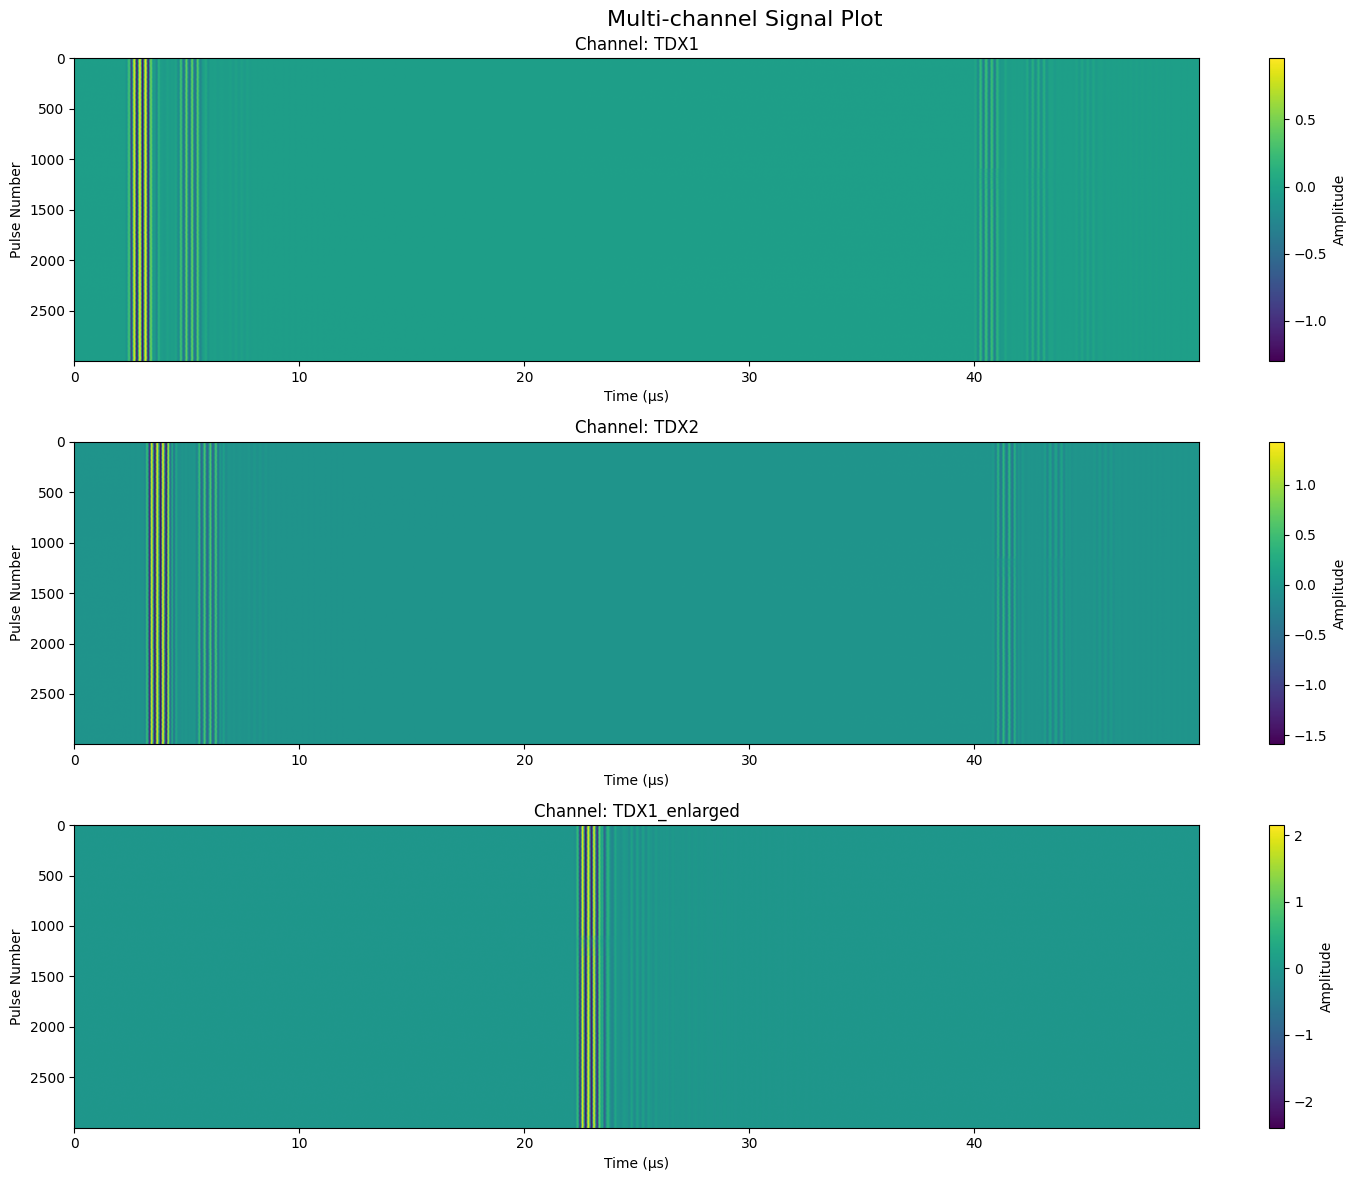

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = np.load('D:\csvfiles\sandbox\P20240726-1600_multi_channel.npz', allow_pickle=True)
signal_data = data['signal_data']

# メタデータの読み込み
metadata = data['metadata'].item()
Tinterval = metadata['Tinterval']  # サンプリング間隔を取得

# List of channel names
channels = ['TDX1', 'TDX2', 'TDX1_enlarged']

# Plot settings
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Multi-channel Signal Plot', fontsize=16)

# Plot for each channel
for i, channel in enumerate(channels):
    # Get channel index
    channel_idx = channels.index(channel)
    
    # Get and preprocess data
    channel_data = signal_data[channel_idx]
    
    # Replace infinite values with NaN
    channel_data = np.where(np.isinf(channel_data), np.nan, channel_data)
    
    # Calculate time axis using Tinterval from metadata (convert to microseconds)
    time_axis = np.arange(channel_data.shape[1]) * Tinterval * 1e6  # Convert seconds to microseconds
    
    # Plot
    im = axes[i].imshow(channel_data, aspect='auto', cmap='viridis',
                       extent=[0, time_axis[-1], channel_data.shape[0]-0.5, -0.5])
    axes[i].set_title(f'Channel: {channel}')
    axes[i].set_xlabel('Time (μs)')  # Time axis is now in microseconds
    axes[i].set_ylabel('Pulse Number')
    
    # Add colorbar
    plt.colorbar(im, ax=axes[i], label='Amplitude')

plt.tight_layout()
plt.show()
